In [34]:
# Search

%matplotlib inline

import networkx as nx
from matplotlib import pyplot as plt
from collections import deque
from heapq import heappop, heappush

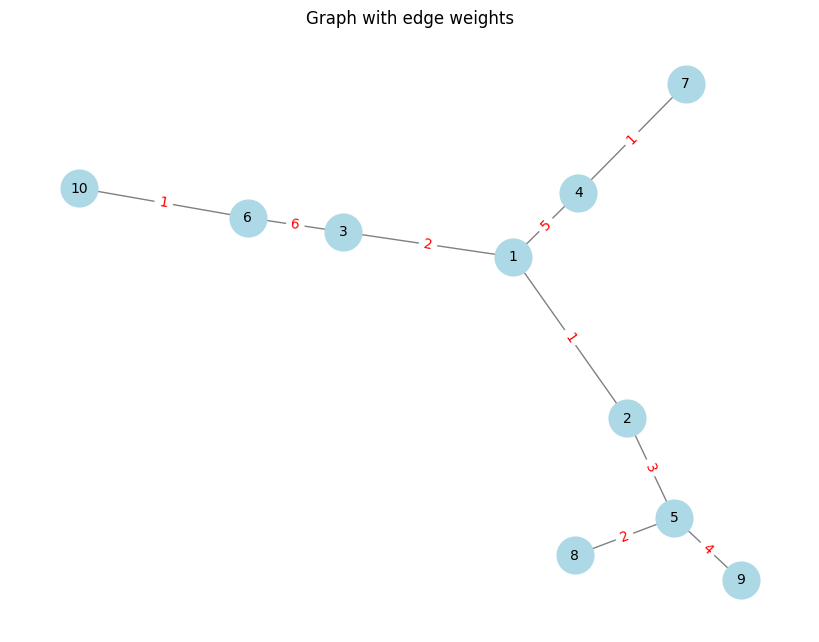

In [35]:
graph = nx.Graph()
graph.add_weighted_edges_from([('1', '2', 1), ('1', '3', 2), ('1', '4', 5), ('2', '5', 3), 
                  ('3', '6', 6), ('4', '7', 1), ('5', '8', 2), ('5', '9', 4),
                  ('6', '10', 1)])

# Draw the graph
# Define positions for nodes
pos = nx.spring_layout(graph)  # Generates a layout for visualization
plt.figure(figsize=(8, 6))
nx.draw(graph, 
        pos, 
        with_labels=True, 
        node_color="lightblue", 
        edge_color="gray", 
        node_size=700,
        font_size=10)

# Extract edge weights and display them
edge_labels = nx.get_edge_attributes(graph, "weight")
nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels, font_size=10, font_color="red")

plt.title("Graph with edge weights")
plt.show()


In [36]:
graph['1']['2']

{'weight': 1}

In [64]:
# Stack
class Stack:
    def __init__(self):
        self.data = deque()

    def __len__(self):
        # print("calculating stack length")
        return len(self.data)
        
    def push(self, item):
        self.data.append(item)

    def pop(self):
        return self.data.pop()

In [74]:
# Queue fifo
class Queue:
    def __init__(self):
        self.data = deque()

    def __len__(self):
        # print("calculating Queue length")
        return len(self.data)

    def push(self, item):
        self.data.append(item)

    def pop(self):
        return self.data.popleft()

In [68]:
# Priority Queue fifo
class PriorityQueue:
    def __init__(self):
        self.data = []

    def __len__(self):
        # print("calculating PQ length")
        return len(self.data)

    def push(self, item):
        heappush(self.data, item)

    def pop(self):
        return heappop(self.data)

In [57]:
stack = Stack()
queue1 = Queue()
queue2 = Queue()
pq = PriorityQueue()

stack.push('1')
stack.push('2')

queue1.push('1')

queue2.push('1')
queue2.push('2')
queue2.push('3')

pq.push('1')
pq.push('2')
pq.push('3')
pq.push('4')

print(len(queue1))
print(len(queue2))
print(len(pq))

print(len(stack))

calculating Queue length
1
calculating Queue length
3
calculating PQ length
4
calculating stack length
2


In [71]:
def search(graph, start, goal, queue):
    visited = set()    
    queue.push((0, start))    
    while len(queue) > 0:
        item = queue.pop()
        cost = item[0]
        node = item[1]
        
        print(node)
        visited.add(node)

        if node == goal:
            return
        
        for next_node, attributes in graph[node].items():
            if next_node not in visited:
                next_cost = attributes['weight'] + cost
                queue.push((next_cost, next_node))

In [77]:
search(graph, '1', '5', Stack())

1
4
7
3
6
10
2
5


In [32]:
[(k, v['weight']) for k, v in graph['1'].items()]

[('2', 1), ('3', 2), ('4', 5)]

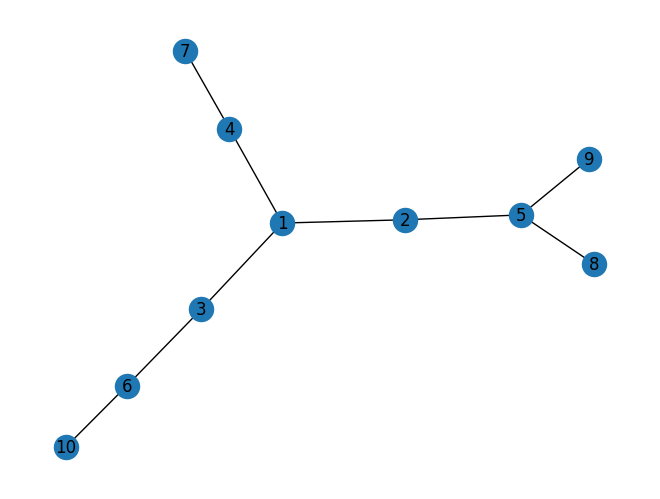

In [11]:
G = nx.Graph({
    '1': ['2', '3', '4'],
    '2': ['5'],
    '3': ['6'],
    '4': ['7'],
    '5': ['8', '9'],
    '6': ['10'],
    '7': [],
    '8': [],
    '9': [],
    '10': []
})

# BFS(G, '5')

G.edges(['5'])
nx.draw(G, with_labels=True)

In [10]:
BFS(G, '5')

5
2
8
9
1
3
4
6
7
10
